Regresión Logística con Python
Al completar este laboratorio, podrás:

Usar Regresión Logística para clasificación.

Preprocesar datos para modelado.

Implementar Regresión Logística en datos del mundo real.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Clasificación con Regresión Logística
Escenario

Supongamos que trabajas para una empresa de telecomunicaciones que está preocupada por la cantidad de clientes que están dejando su servicio de línea fija en favor de competidores de cable. Necesitan entender quiénes tienen más probabilidades de abandonar la empresa.

Cargar los datos de Telco Churn

Telco Churn es un archivo de datos hipotético que trata sobre los esfuerzos de una empresa de telecomunicaciones para reducir la pérdida de clientes en su base de usuarios. Cada caso corresponde a un cliente diferente y registra diversa información demográfica y sobre el uso de servicios. Antes de poder trabajar con los datos, debes usar la URL para obtener el archivo ChurnData.csv.

Acerca del conjunto de datos

Usaremos un conjunto de datos de telecomunicaciones para predecir la pérdida de clientes (churn). Este es un conjunto de datos histórico de clientes, donde cada fila representa a un cliente. Los datos son relativamente fáciles de entender y es posible que descubras información útil que puedas aplicar de inmediato. Por lo general, es menos costoso mantener a los clientes actuales que adquirir nuevos, por lo que el objetivo de este análisis es predecir qué clientes permanecerán con la empresa.

Este conjunto de datos proporciona información sobre las preferencias de los clientes, los servicios que han contratado, datos personales, etc., lo cual ayuda a predecir la pérdida de clientes.

### Carga los datos desde la URL

In [2]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


Vamos a seleccionar algunas características para el modelado. Además, cambiaremos el tipo de dato del objetivo a entero, ya que esto es un requisito del algoritmo de scikit-learn:

## Preprocesamiento de Datos

Para este laboratorio, podemos usar un subconjunto de los campos disponibles para desarrollar nuestro modelo. Supongamos que los campos que utilizaremos son 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' y, por supuesto, 'churn'.

In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


Para el modelado, se deben definir los campos de entrada X y el campo objetivo y. Dado que el objetivo a predecir es 'churn', los datos de este campo se almacenarán en la variable y.

Podemos usar cualquier combinación o todos los campos restantes como entradas. Estos valores se almacenarán en la variable X.

In [4]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  #print the first 5 values
y = np.asarray(churn_df['churn'])
y[0:5]  #print the first 5 values

array([1, 1, 0, 0, 0])

In [5]:
y = np.asarray(churn_df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

También es una práctica habitual estandarizar o normalizar el conjunto de datos para que todas las características estén en la misma escala. Esto ayuda al modelo a aprender más rápido y mejora su rendimiento. Podemos usar la función StandardScaler de la biblioteca Scikit-Learn.

In [6]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Separando el dataset
También es una práctica habitual estandarizar o normalizar el conjunto de datos para que todas las características estén en la misma escala. Esto ayuda al modelo a aprender más rápido y mejora su rendimiento. Podemos usar la función StandardScaler de la biblioteca Scikit-Learn.

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Modelado de clasificador de regresión Logística

Construyamos el modelo usando LogisticRegression del paquete Scikit-Learn y ajustemos el modelo con el conjunto de datos de entrenamiento.

In [9]:
LR = LogisticRegression().fit(X_train,y_train)

El ajuste, o en términos simples, el entrenamiento, nos proporciona un modelo que ha aprendido a partir del conjunto de datos de entrenamiento y que ahora puede usarse para predecir la variable de salida. Hagamos la predicción del parámetro churn para el conjunto de datos de prueba.

In [10]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Para comprender esta predicción, también podemos observar la probabilidad de predicción de cada punto del conjunto de datos de prueba. Usando la función predict_proba, podemos obtener la probabilidad de cada clase.

La primera columna indica la probabilidad de que el registro pertenezca a la clase 0.

La segunda columna indica la probabilidad de pertenecer a la clase 1.

Ten en cuenta que el sistema de predicción de clases utiliza un umbral de 0.5 para asignar la clase. Esto significa que la clase predicha es aquella que tiene mayor probabilidad.

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Dado que el objetivo aquí es predecir la clase 1 con mayor precisión, también podemos examinar qué papel juega cada característica de entrada en la predicción de la clase 1. Considera el siguiente código.

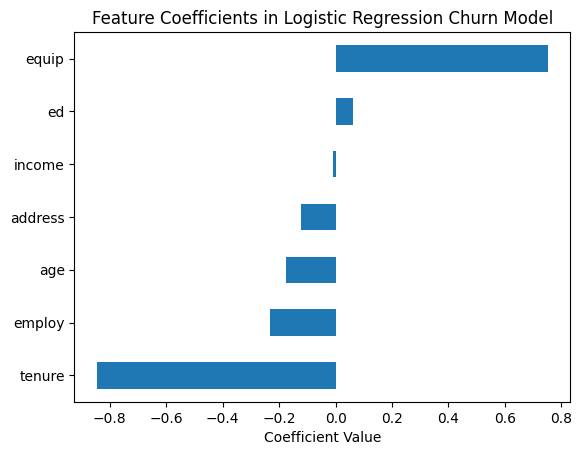

In [12]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Un valor positivo grande del coeficiente de la Regresión Logística para un campo determinado indica que un aumento en ese parámetro incrementará la probabilidad de que la clase sea positiva, es decir, clase 1.

Un valor negativo grande indica lo contrario, es decir, que un aumento en ese parámetro disminuirá la probabilidad de que la clase sea positiva.

Un valor absoluto bajo indica un efecto más débil del cambio en ese campo sobre la clase predicha.

Examinemos esto con los siguientes ejercicios.

## Evaluación de desempeño
Una vez que se han generado las predicciones, es recomendable evaluar el rendimiento del modelo al predecir la variable objetivo. Vamos a evaluar el valor de log-loss.

## Log-loss

El log loss (pérdida logarítmica), también conocido como Binary Cross Entropy Loss, es una función que genera un valor de pérdida basado en las probabilidades de predicción por clase y las etiquetas de clase reales.

Mientras más bajo sea el valor de log loss, mejor se considera el modelo.

In [13]:
log_loss(y_test, yhat_prob)

0.6257718410257235

Ejercicios Prácticos

Intenta responder las siguientes preguntas por ti mismo basándote en lo que aprendiste en este laboratorio.

a. Supongamos que agregamos la característica 'callcard' al conjunto original de características de entrada.

¿Cuál sería el valor de log loss en este caso?

<Reutiliza todo el código anterior después de modificar el valor de **churn_df**. Asegúrate de editar la lista de características que alimentan la variable **X**. El valor esperado es **0.6039104035600186**.

b. Supongamos que agregamos la característica 'wireless' al conjunto original de características de entrada.

¿Cuál sería el valor de log loss en este caso?

Reutiliza todo el código anterior después de modificar el valor de **churn_df**. Asegúrate de editar la lista de características que alimentan la variable **X**. El valor esperado es **0.7227054293985518**.

c. ¿Qué sucede con el valor de log loss si agregamos 'callcard' y 'wireless' a las características de entrada?

Reutiliza todo el código anterior después de modificar el valor de **churn_df**. Asegúrate de editar la lista de características que alimentan la variable **X**. El valor esperado es **0.7760557225417114**.

d. ¿Qué sucede con el log loss si eliminamos la característica 'equip' del conjunto original de características de entrada?

Reutiliza todo el código anterior después de modificar el valor de **churn_df**. Asegúrate de editar la lista de características que alimentan la variable **X**. El valor esperado es **0.5302427350245369**.

e. ¿Qué sucede con el log loss si eliminamos las características 'income' y 'employ' del conjunto original de características de entrada?

Reutiliza todo el código anterior después de modificar el valor de **churn_df**. Asegúrate de editar la lista de características que alimentan la variable **X**. El valor esperado es **0.6529317169884828**.